In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('student_feedback.csv')

df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [ ]:

df.drop(columns=['Unnamed: 0'], inplace=True)


In [ ]:
df.head()


,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Student ID                                            1001 non-null   int64
 1   Well versed with the subject                          1001 non-null   int64
 2   Explains concepts in an understandable way            1001 non-null   int64
 3   Use of presentations                                  1001 non-null   int64
 4   Degree of difficulty of assignments                   1001 non-null   int64
 5   Solves doubts willingly                               1001 non-null   int64
 6   Structuring of the course                             1001 non-null   int64
 7   Provides support for students going above and beyond  1001 non-null   int64
 8   Course recommendation based on relevance              1001 non-null   int64
dty

,0
Student ID,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [ ]:
df.columns = ['Student_ID', 'Subject_Knowledge', 'Concept_Clarity', 'Presentation_Use',
              'Assignment_Difficulty', 'Doubt_Support', 'Course_Structure',
              'Extra_Support', 'Course_Relevance']


/tmp/ipython-input-6-3211148804.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='Blues_d')


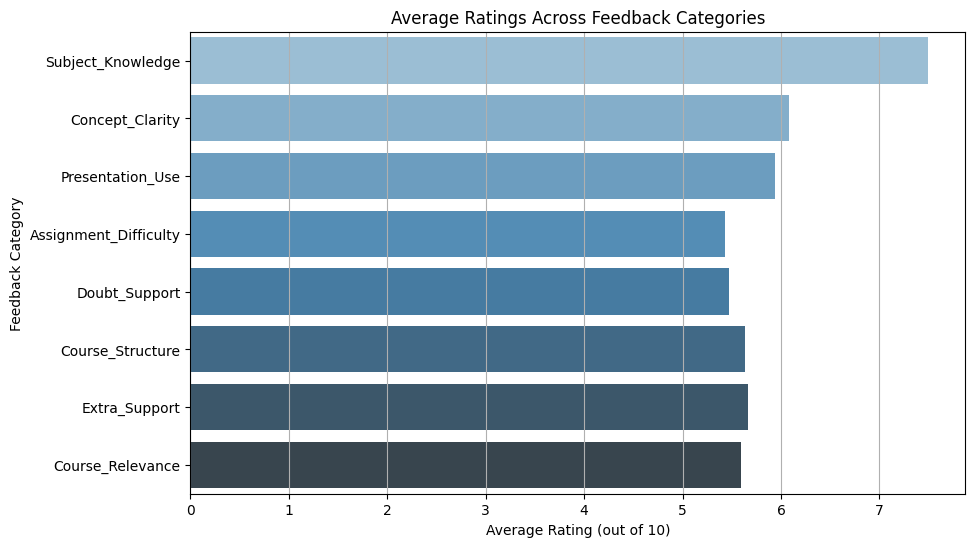

In [ ]:

rating_cols = df.columns[1:]

avg_ratings = df[rating_cols].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='Blues_d')
plt.title('Average Ratings Across Feedback Categories')
plt.xlabel('Average Rating (out of 10)')
plt.ylabel('Feedback Category')
plt.grid(axis='x')
plt.show()


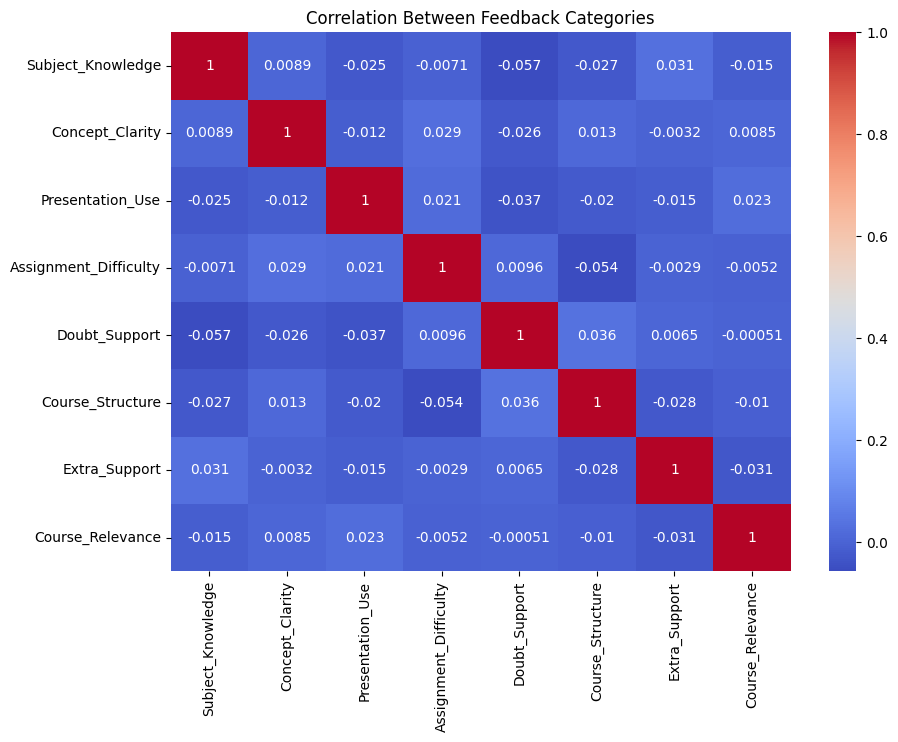

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(df[rating_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Feedback Categories')
plt.show()


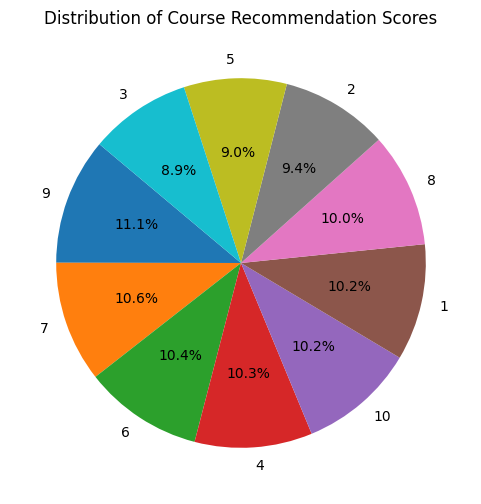

In [ ]:
recommendation_counts = df['Course_Relevance'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(recommendation_counts, labels=recommendation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Course Recommendation Scores')
plt.show()


In [ ]:
import numpy as np

sample_comments = [
    "The course was amazing and well-organized!",
    "It was average, can be improved.",
    "Difficult to understand, needs more support.",
    "Enjoyed the sessions thoroughly!",
    "Not very engaging, felt disconnected.",
    "Great structure and teacher was supportive.",
    "Too many assignments, quite stressful.",
    "Excellent explanations and examples.",
    "Good course but lengthy.",
    "Very helpful and informative.",
    "Slides were too cluttered at times.",
    "Instructor was always available to help.",
    "Assignments were relevant and practical.",
    "Would recommend to other students.",
    "Course felt rushed in the end.",
    "Paced well and covered core concepts.",
    "Support from the teacher made a difference."
]


df['Comments'] = np.random.choice(sample_comments, size=len(df))


In [ ]:
!pip install textblob


In [ ]:
from textblob import TextBlob

# Get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['Sentiment_Polarity'] = df['Comments'].apply(get_sentiment)

# Label polarity into categories
def label_sentiment(p):
    if p > 0.1:
        return 'Positive'
    elif p < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Sentiment_Polarity'].apply(label_sentiment)


/tmp/ipython-input-15-3672359067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Label', data=df, palette='Set2')


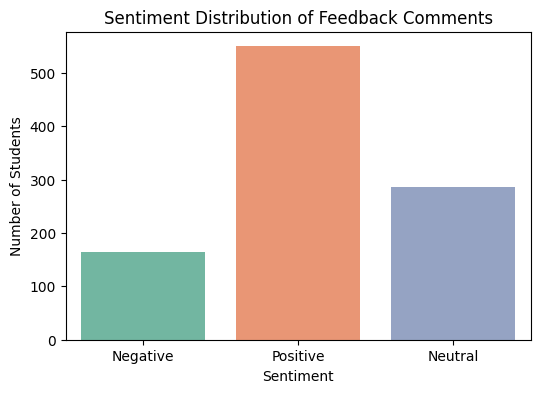

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment_Label', data=df, palette='Set2')
plt.title('Sentiment Distribution of Feedback Comments')
plt.ylabel('Number of Students')
plt.xlabel('Sentiment')
plt.show()


# 🎓 College Event Feedback Analysis – Internship Task 3  
## 📁 Dataset: Student Feedback Survey Responses (Kaggle)  
## 👩‍💻 Intern: Esha Adhya Shrivastava | CIN ID: FIT/JUN25/DS2805  

---

##  Step 1: Importing Libraries and Loading Dataset

##  Step 2: Data Cleaning and Renaming Columns

##  Step 3: Ratings Overview  
- 📊 Bar Chart  
- 🌡️ Heatmap  
- 🥧 Pie Chart  

##  Step 4: Sentiment Analysis Using TextBlob  
- 💬 Simulated Comments  
- 📈 Sentiment Polarity & Labeling  
- 📉 Sentiment Distribution Plot  

##  Step 5: Key Insights & Recommendations


##  Key Insights:
- Most students rated the instructors highly in subject knowledge and support.
- Course structure and use of presentations showed room for improvement.
- Sentiment analysis of feedback comments indicates majority positive sentiments, reflecting a generally satisfied student experience.

##  Recommendations for Future Events:
- Consider simplifying or pacing assignments more gradually to reduce difficulty perception.
- Increase the use of interactive and visually appealing presentation tools.
- Offer clear, structured course outlines and communicate expectations early on.
